# [Case Study] Phân tích các nhân tố ảnh hưởng tới giá xe hơi

Mô tả bài toán: 
Công ty ô tô Geely Auto của Trung Quốc muốn gia nhập thị trường Mỹ bằng cách thành lập nhà máy sản xuất của họ ở Mỹ để tạo sức cạnh tranh với các đối thủ Mỹ và Châu âu tại thị trường Mỹ. Công ty Geely Auto đã ký hợp đồng với một công ty tư vấn ôtô để tìm hiểu các yếu tác động tới giá ô tô. Cụ thể họ muốn tìm hiểu các đặc điểm của một chiếc xe sẽ ảnh hưởng tới việc định giá ô tô tại thị trường Mỹ, vì có thể thị hiếu của người tiêu dùng Mỹ có điểm khác biệt so với người tiêu dùng ở Trung quốc. Công ty muốn biết:

- Có những thuộc tính nào có ý nghĩa trong việc định giá của một chiếc xe hơi
- Các thuộc tính đó có liên hệ với giá xe như thế nào

# Read data

In [198]:
# Import libraríe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm 

In [159]:
# Read data
df = pd.read_csv('Case_study_CarPrice_Assignment.csv')

In [160]:
# Inspect the shape of the dataset
df.shape

(205, 26)

Đọc hiểu dữ liệu
- car_ID : Mã xe
- symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro)
- carName: Tên xe
- fueltype: Loại nhiên liệu
- aspiration: loại hút (turbo hoặc std)
- doornumber: Số lượng cửa
- carbody: Loại thân xe (sedan, wagon, hatchback)
- drivewheel: Loại bánh xe
- enginelocation: Vị trí động cơ
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- carheight: Chiều cao xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- cylindernumber: Số lượng xi lanh đặt trong xe
- enginesize: Kích thước động cơ
- fuelsystem: Hệ thống nhiên liệu của xe ô tô
- boreratio: Tỉ số hành trình
- stroke: số kỳ hoăc kích thước bên trong động cơ
- compressionratio: Tỉ số nén của ôtô
- horsepower: Mã lực
- peakrpm: Tốc độ động cơ cao nhất
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
- price: Giá xe


# Data cleaning

In [161]:
# First 5 lines
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [162]:
# Inspect data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Nhận xét: 
- doornumber và cylindernumber nên là int thay vì object
- không có dữ liệu khuyết thiếu

In [163]:
# Data description
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [164]:
# Detect wrong data in doornumber column
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [165]:
# Fix data of doornumber column
df['doornumber'].replace({'two': 2, 'four': 4}, inplace=True)

In [166]:
# Detect wrong data in cylindernumber
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [167]:
# Fix data of cylindernumber
df['cylindernumber'].replace({'two': 2, 'three':3,'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}, inplace=True)

In [169]:
df = df.drop(['CarName', 'car_ID'],axis=1) # Drop CarName since it is not relevant

In [170]:
# Check that the types of data is now correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

# Data visualization

In [171]:
# Select only numerical data
df_num = df.select_dtypes(include=['int64', 'float'])
df_num.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


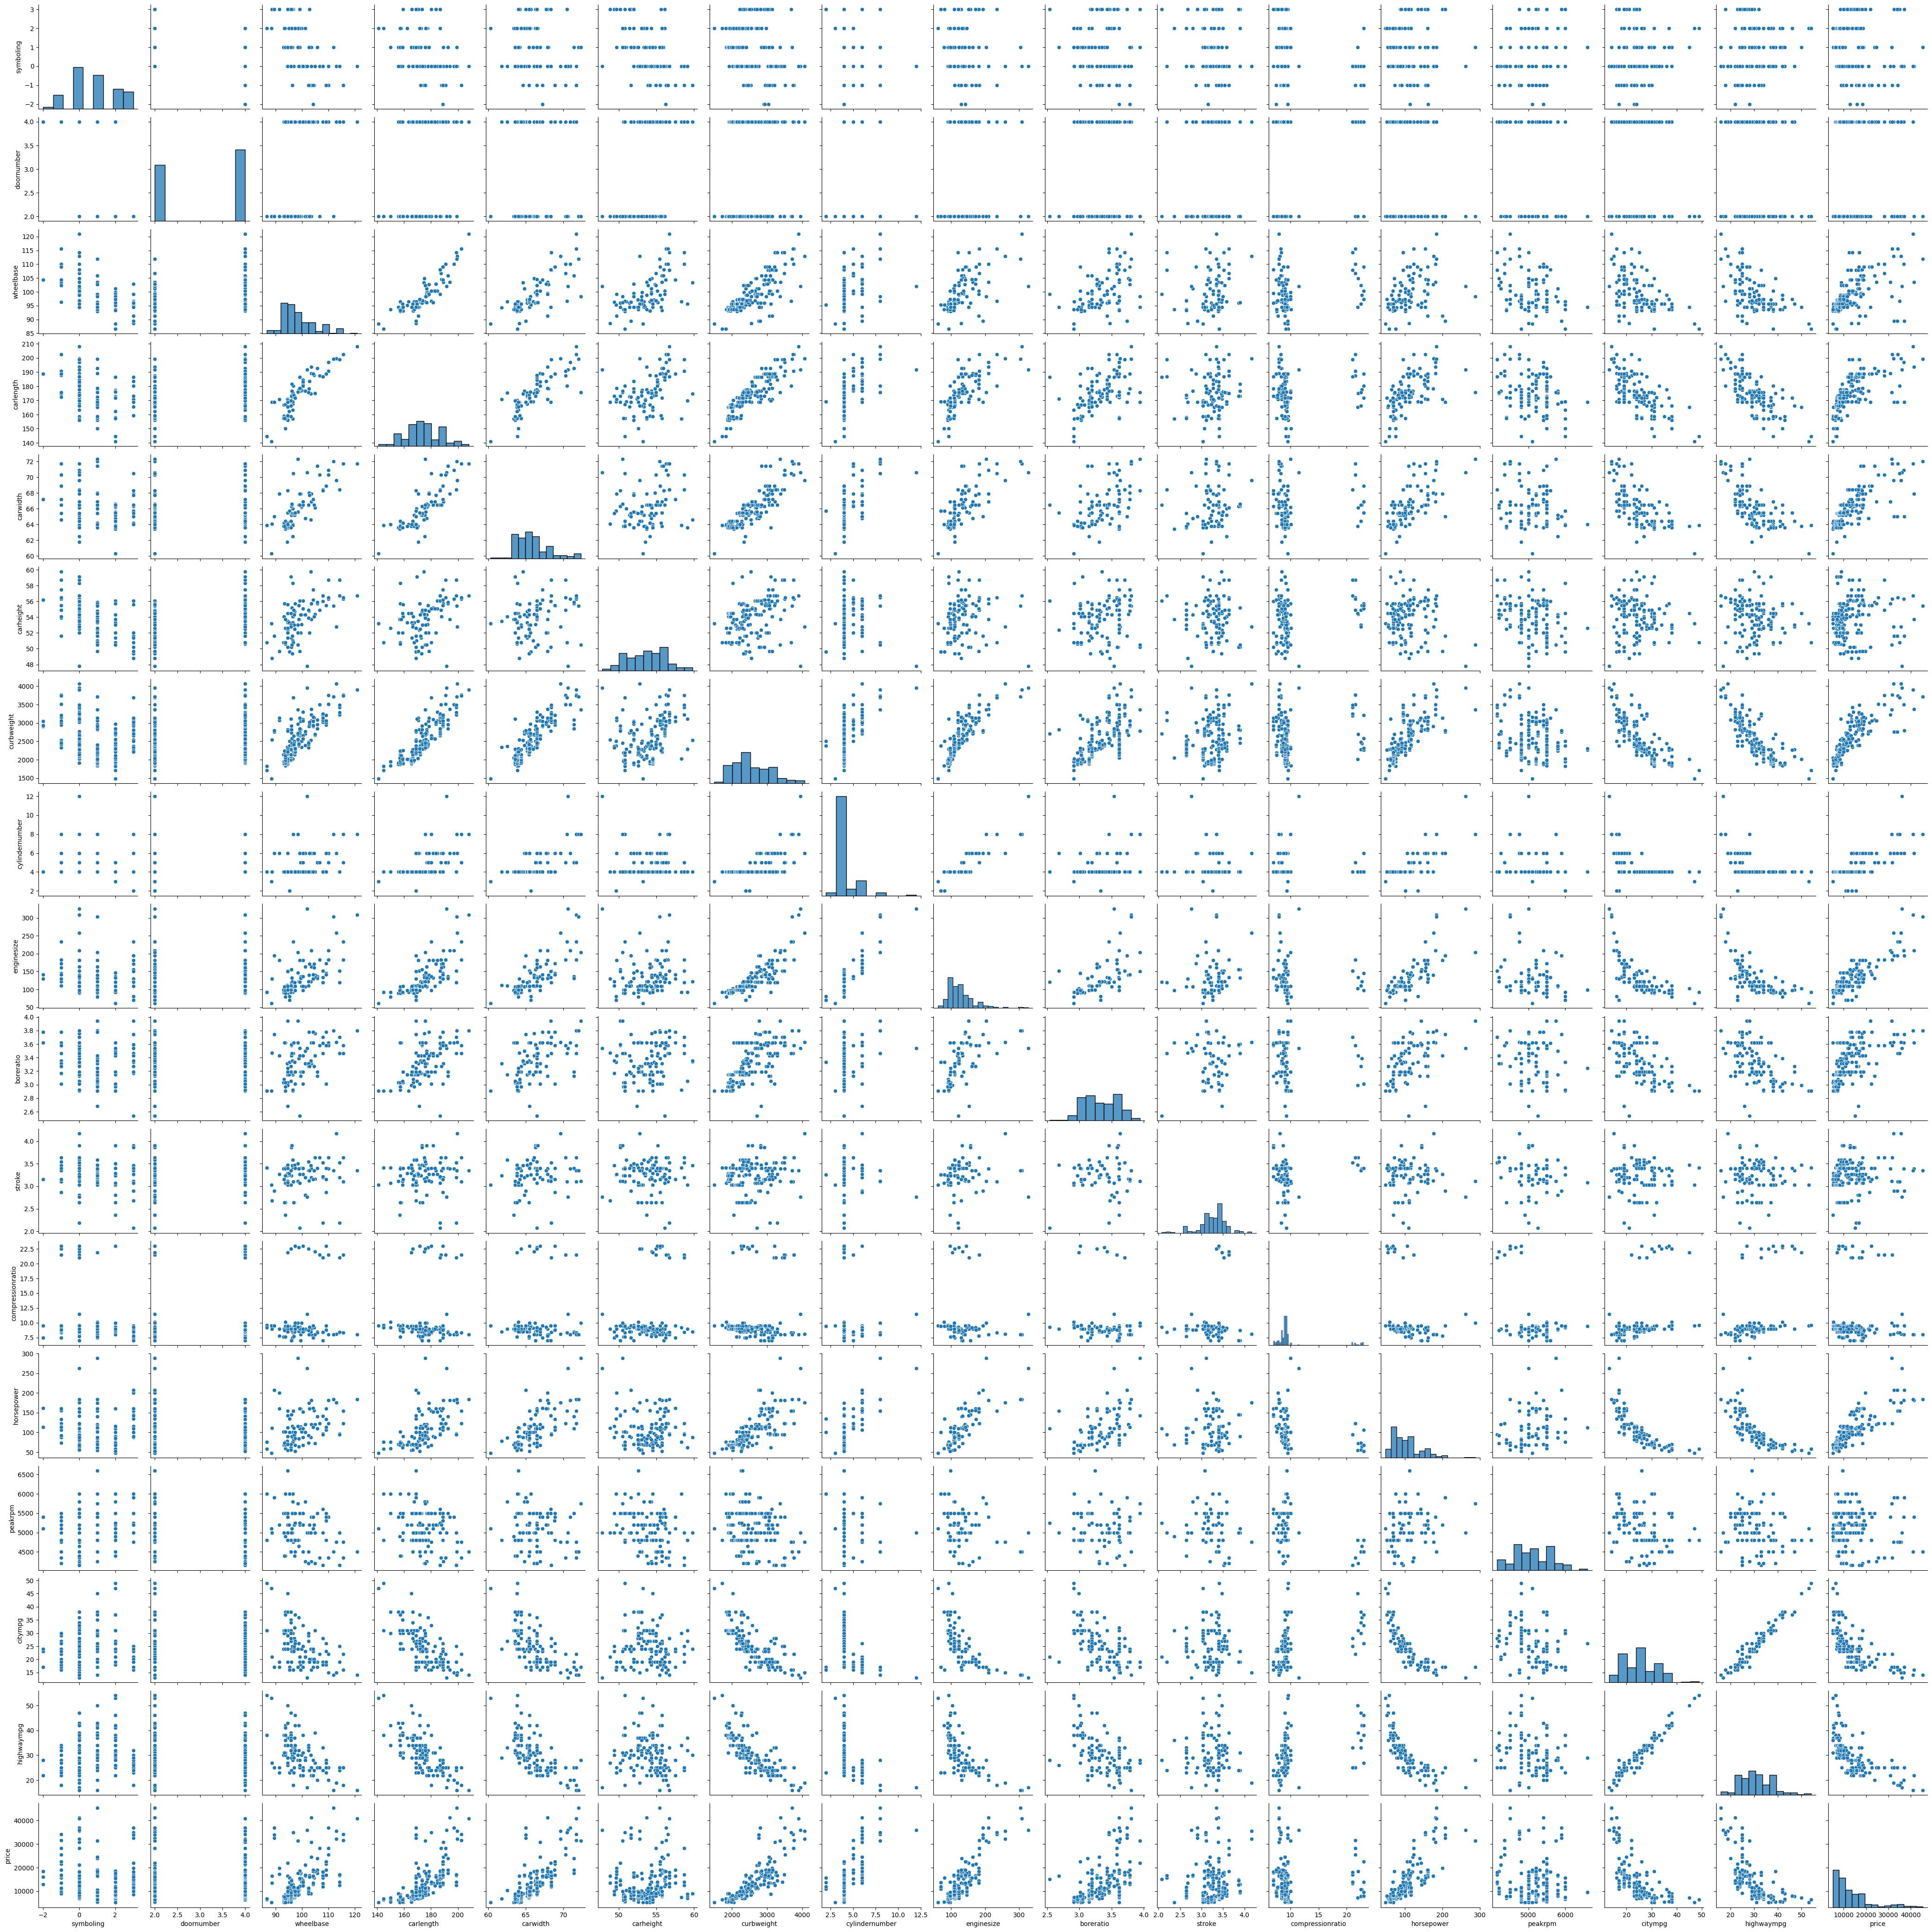

In [172]:
# Draw pair plots to inspect relationships between numerical values
sns.pairplot(df_num)

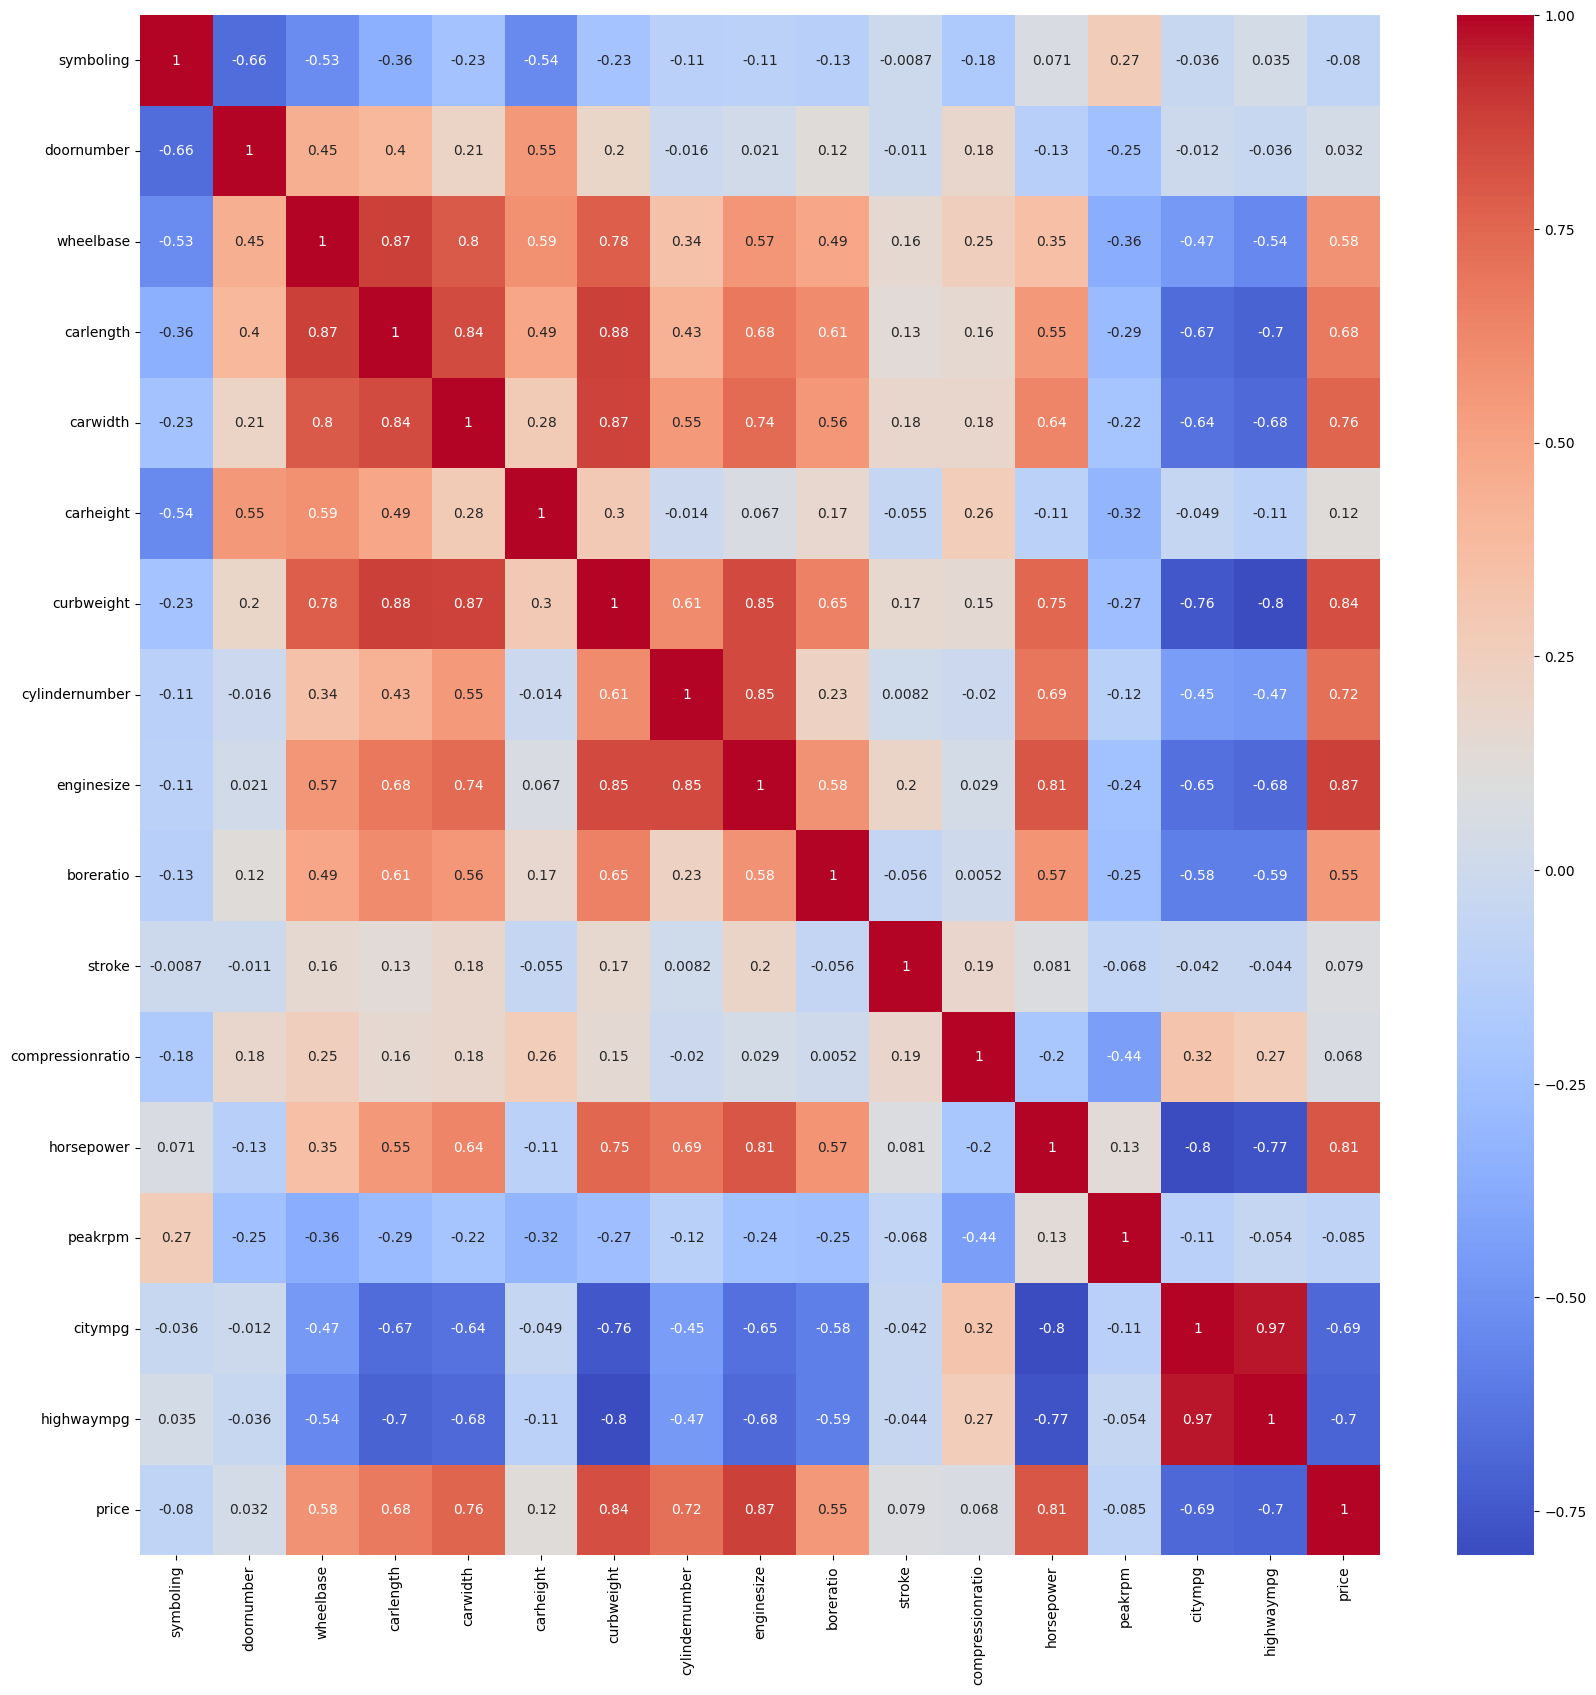

In [173]:
# Since there are many columns, using heatmap for better visualization of correlations
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), annot= True, cmap = 'coolwarm')
plt.show()


 Nhận xét:
- Price tỉ lệ thuận mạnh với: wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower
- Price tỉ lệ nghịch với: symboling, peakrpm, citympg, highwaympg
- Có nhiều variable khác có tương quan với nhau, ví dụ như curbweight và carlength, enginesize và horsepower, vv

In [174]:
# Find categorical columns
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi


<Axes: xlabel='fuelsystem', ylabel='price'>

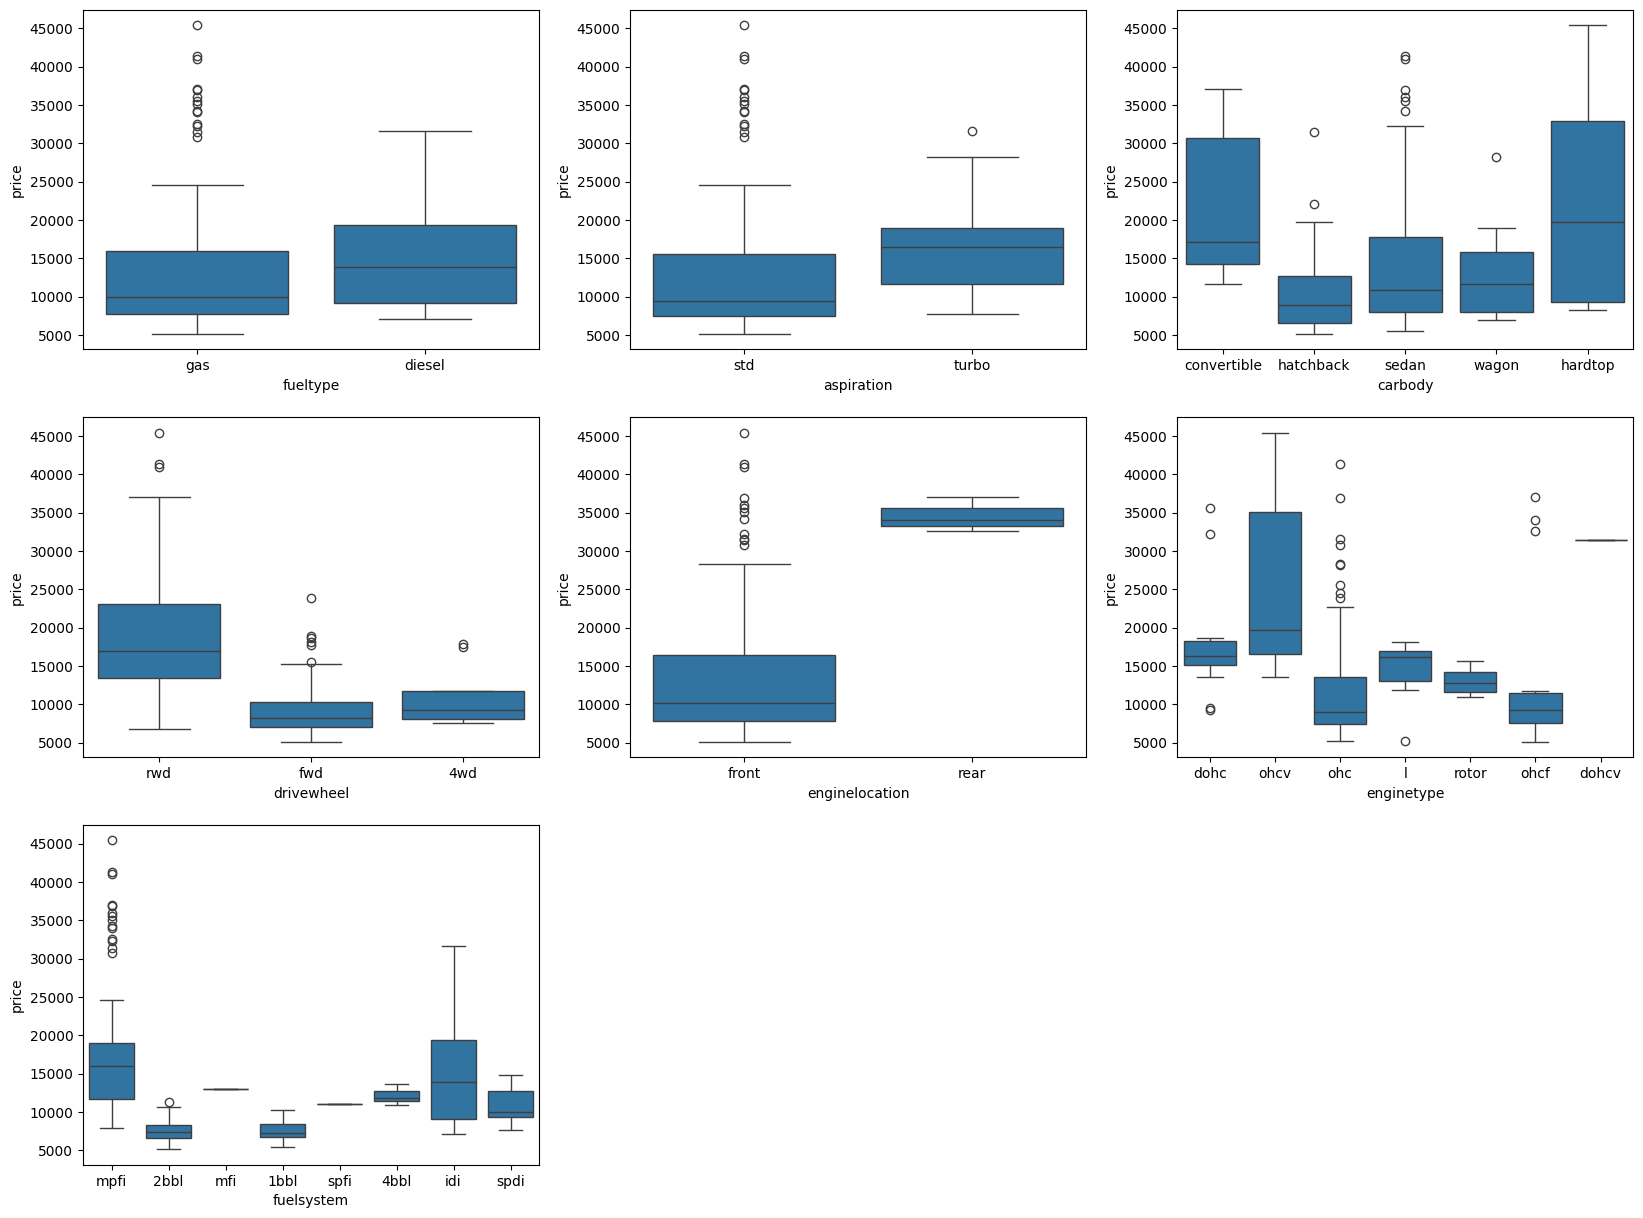

In [175]:
# Use boxplots to visualize price distribution according to groups of qualitative variables
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

Nhận xét:
1. Giá xe diesel cao hơn giá xe gas. Tuy nhiên có một số giá trị ngoại lai của xe chạy bằng gas có giá cao hơn hẳn và có thể cao hơn xe chạy diesel
2. Xe có loại hút turbo có giá cao hơn xe có loại hút std. Giá trị trung vị của turbo còn cao hơn 75th percentile của std
3. Trung vị của giá xe hatchback là thấp nhất và trung vị của giá xe hardtop là cao nhất.
4. Giá xe có rear-wheel-drive cao hơn giá xe có 4-wheel-drive và cao hơn giá xe chỉ có front-wheel-drive. 
5. Phần lớn các xe trong bộ dữ liệu có động cơ đặt ở phía trước (front) và giá các xe này thấp hơn xe có động cơ đặt ở sau (rear)
6. Xe có loại động cơ 'ohcv' có giá trung vị cao nhất và xe có loại động cơ 'ohc' có giá trung vị thấp nhất
7. Xe có hệ thống nhiên liệu 'mpfi' có giá trung vị cao nhất trong các loại

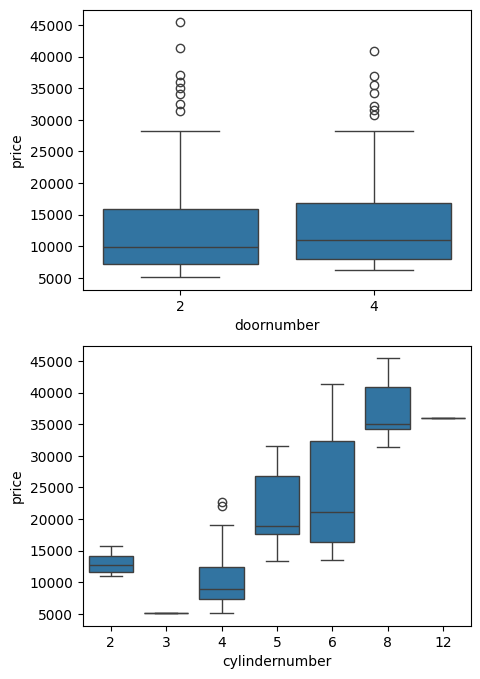

In [176]:
# Use boxplot for correlation of price and doornumber/cylinder number
plt.figure(figsize=(5,8))
plt.subplot(2,1,1)
sns.boxplot(x= 'doornumber', y = 'price', data = df)
plt.subplot(2,1,2)
sns.boxplot(x= 'cylindernumber', y = 'price', data = df)
plt.show()

 Nhận xét:
- Trung vị giá của xe 4 cửa cao hơn xe 2 cửa nhưng có một số xe 2 cửa có giá cao nhất
- Nhìn chung xe có càng nhiều cylinder thì giá càng cao. Tuy nhiên xe có 3 và 4 cylinder lại có giá thấp hơn xe có 2 cylinder

# Data Preprocessing

In [177]:
# Encoding categorical data using Onehot Encoder
df_dummies = pd.get_dummies(categorical_cols).astype('int')
df_dummies.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [178]:
# Replacing categorical data with dummies in dataframe
df = pd.concat([df, df_dummies], axis= 1)
df = df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], axis =1)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [180]:
df.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [181]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   doornumber            205 non-null    int64  
 2   wheelbase             205 non-null    float64
 3   carlength             205 non-null    float64
 4   carwidth              205 non-null    float64
 5   carheight             205 non-null    float64
 6   curbweight            205 non-null    int64  
 7   cylindernumber        205 non-null    int64  
 8   enginesize            205 non-null    int64  
 9   boreratio             205 non-null    float64
 10  stroke                205 non-null    float64
 11  compressionratio      205 non-null    float64
 12  horsepower            205 non-null    int64  
 13  peakrpm               205 non-null    int64  
 14  citympg               205 non-null    int64  
 15  highwaympg            2

# Model Building

In [182]:
# Assign variable - I choose enginesize since it has the largest correlation to price as seen from heatmap
x = df[['enginesize']]
y = df['price']

# Separate data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 102)

# Building model
lr = LinearRegression()

# Apply to train 
lr.fit(x_train, y_train)

# Read result of model
coefficient = lr.coef_
intercept = lr.intercept_

print(coefficient, intercept)

[168.39204892] -8007.0817058917255


In [183]:
# Predictive results
y_pred = lr.predict(x_test)

In [184]:
# Compare y_pred and y_test
print(f"mean absolute error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"mean squared error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {np.sqrt(metrics.mean_absolute_error(y_test, y_pred))}")

mean absolute error: 2823.4182686419012
mean squared error: 15137823.226353645
root mean squared error: 53.135847303321526


In [185]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Kết quả chấp nhận được vì mean absolute error là 2823, nhỏ hơn so với mean (13276) và standard deviation (7988)

In [186]:
# Calculate r_score
print(f"r_score: {r2_score(y_test, y_pred)}")

r_score: 0.5983445233814821


Sự thay đổi của kích cỡ động cơ giải thích cho 59.8% sự thay đổi của giá xe

In [187]:
# Improve model by changing variable
x = df[['carwidth']]
y = df['price']

# Separate data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 102)

# Building model
lr = LinearRegression()

# Apply to train 
lr.fit(x_train, y_train)

# Read result of model
coefficient = lr.coef_
intercept = lr.intercept_

# Predictive results
y_pred = lr.predict(x_test)

# Compare y_pred and y_test
print(f"mean absolute error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"mean squared error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {np.sqrt(metrics.mean_absolute_error(y_test, y_pred))}")

mean absolute error: 2035.827536032714
mean squared error: 6734814.02355162
root mean squared error: 45.12014556750359


In [188]:
# Calculate r_score
print(f"r_score: {r2_score(y_test, y_pred)}")

r_score: 0.8213035721108566


Sự thay đổi của chiều rộng xe giải thích cho 82.1% sự thay đổi của giá xe

# Phần phụ: xây model theo thư viện statsAPI.OLS (chưa học, mình làm thử)

In [199]:
x_train = df.drop('price', axis =1)
y_train = df['price']

lr_1 = sm.OLS(y_train,x_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     55.60
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           5.80e-76
Time:                        21:44:28   Log-Likelihood:                -1867.1
No. Observations:                 205   AIC:                             3810.
Df Residuals:                     167   BIC:                             3936.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
symboling              298.2036 

In [201]:
# Dropping variables with large p-value
x_train = df[['carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo','carbody_hardtop','carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'enginelocation_front', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_mfi', 'fuelsystem_spfi']]
y_train = df['price']

lr_2 = sm.OLS(y_train,x_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     86.63
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           4.59e-85
Time:                        21:54:57   Log-Likelihood:                -1877.7
No. Observations:                 205   AIC:                             3803.
Df Residuals:                     181   BIC:                             3883.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
carwidth               756.7218 

In [202]:
# Repeat the process of dropping variable with large p-value
x_train = df[['carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm','carbody_hardtop','carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'enginelocation_front', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohcv', 'enginetype_rotor']]
y_train = df['price']

lr_3 = sm.OLS(y_train,x_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              360.2
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                   1.80e-133
Time:                        21:57:07   Log-Likelihood:                         -1908.5
No. Observations:                 205   AIC:                                      3851.
Df Residuals:                     188   BIC:                                      3907.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [203]:
# Repeat the process of dropping variable with large p-value
x_train = df[['carwidth', 'enginesize', 'boreratio', 'stroke', 'peakrpm','carbody_hardtop','carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'enginelocation_front', 'enginetype_dohc', 'enginetype_ohcv', 'enginetype_rotor']]
y_train = df['price']

lr_4 = sm.OLS(y_train,x_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_4.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              439.1
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                   6.09e-137
Time:                        21:58:02   Log-Likelihood:                         -1909.7
No. Observations:                 205   AIC:                                      3847.
Df Residuals:                     191   BIC:                                      3894.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [208]:
# Repeat the process of dropping variable with large p-value
x_train = df[['carwidth', 'enginesize', 'boreratio', 'stroke', 'drivewheel_fwd', 'enginelocation_front', 'enginetype_ohcv', 'enginetype_rotor']]
y_train = df['price']

lr_5 = sm.OLS(y_train,x_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              697.6
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                   4.50e-140
Time:                        22:00:12   Log-Likelihood:                         -1922.3
No. Observations:                 205   AIC:                                      3861.
Df Residuals:                     197   BIC:                                      3887.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Các variable có ảnh hưởng lớn đến giá xe là:
- carwidth
- enginesize
- boreratio
- stroke
- drivewheel_fwd
- enginelocation_front
- enginetype_ohcv
- enginetype_rotor